# Standard error estimation of optimized paramters in Goniometer measurements
*Anton Kirch, 26 September 2024*

When running Goniometer measurements, you want to extract information about the emission properties of your sample. This could be for example:

- emission zone position (EZP). Actually, this is the position of the center of exciton generation (**CEG**) 
- emission zone width (EZW). Actually, this is the width of the exciton generation profile (i.e. FWHM or $\sigma$ of a Gaussian or whatever, **EGW**)
- perhaps further parameters... 

This is an overview on how to extract the confidence interval (standard error) for any of these parameters, e.g. if you want to present a **CEG(time)** or **EGW(time)** plot.







## Key words
If you want to develop a deeper understanding beyond the "recipe" provided here, I found it useful to check out these keywords:
- Maximum likelihood estimation
https://reliability.readthedocs.io/en/latest/How%20does%20Maximum%20Likelihood%20Estimation%20work.html
- Confidence intervals
https://reliability.readthedocs.io/en/latest/How%20are%20the%20confidence%20intervals%20calculated.html
- Hesse matrix, Covariant matrix (inverse of Hesse matrix), (Fisher information)
- See these <a href = "stat_methods_ws2020_06_least_squares.pdf"> lecture notes </a>


## Best estimator: minimizes error between simulation and experiment
Let's assume two parameters that you want to determine in your LEC for now, e.g. CEG and EGW. You do this by a so-called **estimator** approach ("Maximum likelihood estimation"/"Least-squared error estimation"). It means that you compare the measured spectral intensities $I_{meas}(\lambda,\theta)$ for every wavelength $\lambda$ and every angle $\theta$ to the simulated output of an optical model $I_{sim}(\lambda,\theta)$ and try what set of parameters (CEG, EGW) give the smallest error.

First, we need to define what error we are going to minimize. Usually, to find the best fit in regression analysis, a **lest-square** method is used. That is, you calculate the sum of the squares of the residuals https://en.wikipedia.org/wiki/Least_squares. In our case, the so-called **root mean square error (RMSE)** is used, which describes the standard deviation between the estimator and the measured data, $I^{\text{meas}}_{\lambda,\theta}$ and $I^{\text{sim}}_{\lambda,\theta}(\text{CEG,EGW})$. You can also use the mean square error (MSE) which is just RMSE$^2$. Since the square function is a bijective function here (all values of RMSE are positive), it doesn't matter. Find more details here: https://en.wikipedia.org/wiki/Root_mean_square_deviation

The RMSE is defined as:

$\text{RMSE}(\text{CEG,EGW}) = \left( \frac{1}{N_\lambda-1}\sum_{\lambda} \frac{1}{N_\theta-1}\sum_{\theta} [I^{\text{meas}}_{\lambda,\theta}-I^{\text{sim}}_{\lambda,\theta}(\text{CEG,EGW})]^2\right)^{1/2}$

Note, one has to use the standard deviation for an *unbiased* estimator (*N*-1 in the denominator). https://en.wikipedia.org/wiki/Standard_deviation
Currently, we use 1/*N* which I think is wrong, strictly spoken. But since *N* is so high, it doesn't really matter.

In statistics, the RMSE function would equal the negative log-likelihood function, which would be maximized (you are looking for the maximum likelihood = minimum error) to find the best-fitting parameters.

For every set of parameters (CEG,EGW), you can now calculate the RMSE, which gives you (in this case) a 3D landscape RMSE(CEG, EGW) or MSE(CEG, EGW). The parameters found for the lowest MSE give you the set of best-fitting parameters $\zeta$ (CEG$_\text{opt}$, EGW$_\text{opt}$). This set of parameters $\zeta$ is your "best guess" or "best estimate".

## Confidence interval of the "best estimate" $\zeta$
For any estimator algorithm, you of course have to ask: "How likely is it that my *best guess* indeed is the true set of parameters?". This is commonly done by calculating a confidence interval for every parameter. The common $1\sigma$ confidence interval tells you that you are 68 % sure that the true parameter lies within this interval. Be aware that 68 % is not super high! But it is the commonly used value. We could also use a confidence interval of $2\sigma$, which corresponds to "I am 95 % confident that the true parameter is within the indicated range". But let's stick to $1\sigma$ for now. 

## How to calculate the confidence interval
We have to assume that the residuals $I^{\text{meas}}_{\lambda,\theta}$ and $I^{\text{sim}}_{\lambda,\theta}(\text{CEG,EGW})$ are distributed in a Gaussian shape for the optimized set of parameters ("unbiased estimation"). This is reasonable if we have no systematic bias in our measurement and in our model and we can assume that the Central Limit Theorem is valid (if you measure often enough, your residual histogram evolves into a Gaussian around zero). We could (should) actually check that for a given dataset.

## General idea
The question is now, what is your confidence interval of these best-fitting parameters, i.e. how "good" is the method? The idea is to evaluate your MSE landscape at $\zeta$ in the direction of interest. Let's say, you want to plot the CEG(time) for a given sample, you calculate the curvature of MSE$_\zeta$, which is called the *Hessian matrix*. The higher the curvature, the smaller will be your uncertainty - and vice versa. That's why we have to use the *inverse* of the second derivative, which is called the *Covariant matrix*, and evaluate it in the direction we are interested in (here CEG). The steps in detail are:

### Step 1: Hessian matrix of the mean square error
The Hessian matrix is calculated by the divergence of the mean square error (MSE=RMSE$^2$) landscape at the point of the optimized parameter set $\zeta=(\zeta_i,\zeta_j)$:
\begin{equation}
\text{H}_\zeta = \nabla^2\,\text{MSE}_\zeta = \frac{\partial^2\,\text{MSE}(\zeta)}{\partial \zeta_i \partial \zeta_j}
\end{equation}

### Step 2: Covariant matrix of the mean square error
The Covariant matrix is now the inverse of the Hessian matrix and is multiplied with the variance (squared standard deviation) of the residuals at the optimized parameter set $\zeta$ (which is the MSE) and 2. The "2" I don't really understand right now. It is somehow due to the normal distribution having a factor of 1/2 in the exponent (?? I may have a better answer at some point in time). The multiplication with MSE is intuitive because the MSE itself has an arbitrary quantity. You also could have normalized the MSE landscape in the first place. Then you would not have to multiply it here. It is the same: Either you divide by MSE$_\zeta$ in the beginning (= normalizing) or you multiply it here because we have taken the inverse. 
\begin{equation}
\text{Cov}_\zeta = 2\cdot\text{MSE}_\zeta\cdot\left(\text{H}_\zeta^{-1}\right)
\end{equation}

### Step 3: Calculate the standard error 
The standard error (standard deviation) of an optimized parameter is the square root of its entry in the Covariant matrix:

\begin{equation}
\sigma_j = \sqrt{\left[\text{Cov}_\zeta\right]_{jj}}
\end{equation}

Just be careful to trace back the unit of $\sigma_j$. It should be in **grid steps** because you take both the first and second derivative per grid step (this gives you 1/grid step$^2$ as a unit), then you take the inverse and square root, which leaves you with a "grid step" unit.

The dimensions of H and Cov are equal to the number of parameters of your MSE landscape. Let's say you have an MSE(CEG,EGW), the dimensions of H and Cov would be 2x2. And the subscript $\left[\text{Cov}_\theta\right]_{jj}$ indicates that for the standard error of your $j's$ parameter you take matrix element $jj$. In other words, the $\sigma^2_j$ for all potential parameters are arranged on the diagonal of $\text{Cov}$.

## Summing errors
Depending on what you want to plot you may want to consider several errors. For example, you could end up with $\sigma_\text{CEG}$, $\sigma_\text{EGW}$, and $\sigma_{d_\text{AM}}$. The latter is the absolute error you may get because your film thickness may have an uncertainty, too.
These errors are (to my understanding) independent and therefore need to be added via the Gaussian error propagation (or Euclidian norm, whatever you wanna call it). The total error would read:
\begin{equation}
\sigma_\text{tot}=\sqrt{\sum_i \sigma_i^2}
\end{equation}
For example, in case you want to plot CEG(time), I would consider $\sigma_\text{CEG}$ and $\sigma_{d_\text{AM}}$.

## Open questions
### Question 1: The number of independent measurements $N$
What I wrote above is a conservative error estimation and it is actually done not for the MSE function but for a $\chi^2$ function which is the sum of squared errors, $\chi^2 = N\cdot \text{MSE} = N\cdot \text{RMSE}^2$, with $N$ being the number of independent measurements to obtain 1 RMSE/MSE point. The calculation is all the same BUT you end up with an additional factor $\sqrt{1/N}$ for $\sigma$, the standard error of your best-fitting parameter, in the end. By definition, the $N$ measurements must be independent. Now, one open question would be if you can say that we perform $N_\lambda$ and $N_\theta$ ($N=N_\lambda + N_\theta$) independent measurements to obtain 1 MSE/RMSE value? The idea is that the more often you measure, the smaller the confidence interval/standard error of your mean (optimized parameter) will get. I would say that 1 Goniometer measurement represents 1 independent measurement. Taking one spectrum with $N_\lambda$ points would definitely not qualify as an independent measurement (if you have a displaced spectrum, you can already tell the outcome for all $N_\lambda$ points) and a similar argument holds for $N_\theta$, in my opinion. If you would measure the MSE/RMSE landscape $N$ times at a given point in time (this is purely hypothetical of course because times passes between the measurements), this would qualify in my opinion to divide $\sigma$ by $\sqrt{1/N}$. But here, I am not 100% sure, and this may open a room for discussion.

### Question 2: (A)symmetric standard errors?
As we take the second derivative at the MSE minimum point, we end up with symmetric confidence intervals for our optimized parameters. This may seem odd because the MSE function is often pretty asymmetric around the minimum. One could potentially refine the definition by e.g. averaging the second derivatives around the minimum point in one particular direction.  

# Code example
This is one example how I would calculate the standard error of the CEG for a CEG(time) plot. I did not add the $\sigma_{d_\text{AM}}$ here. It is the same for multidimensional MSE, we then only need to be careful in which direction we are derivating. I hope it works for. The data set is in the same folder as the Jupyter notebook. Be careful about the "path" definition in the beginning. This changes depending on where you save your file. You can check with "print(path)" if you get error messages.

The CEG uncertainties (in grid steps) are at each time step:
[12.9633799  13.1555798  12.51175476 11.96317852 12.93621558 12.55601434
 12.15751989 13.38536955 13.32293893 13.09167167 13.27482056 13.20546988
 12.89165877 12.89044805 12.69206201 12.78098606 12.60333891 12.55014343
 12.49868304 12.34181519 12.31163262 12.24293707 12.06082135 12.17158792
 12.2366417  12.26920357 12.20984985 12.01816772 12.24731332 12.24004432
 12.56588319 12.23341151 12.35606698]


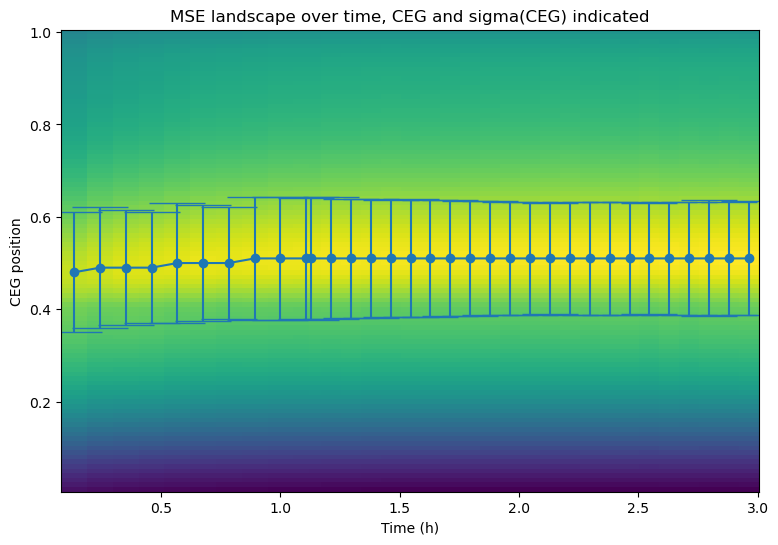

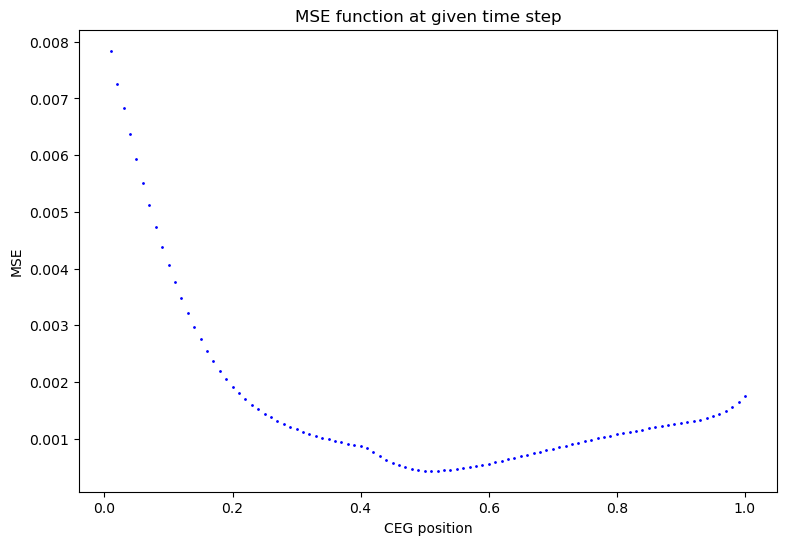

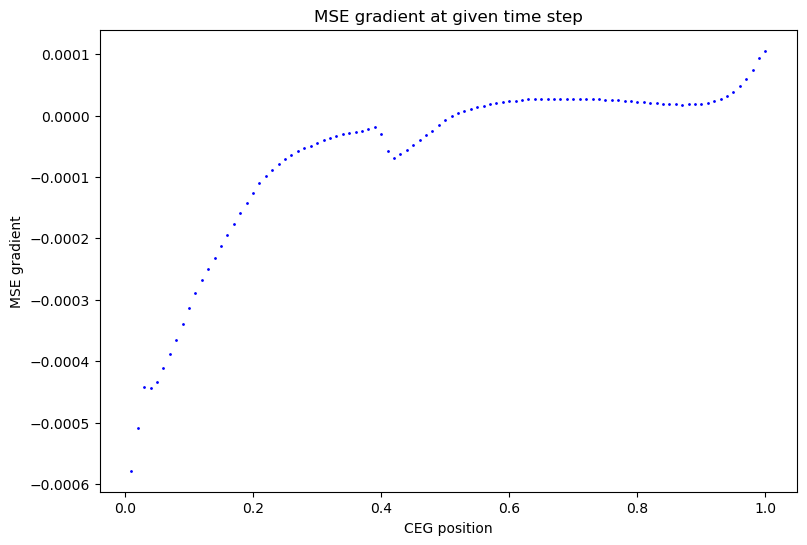

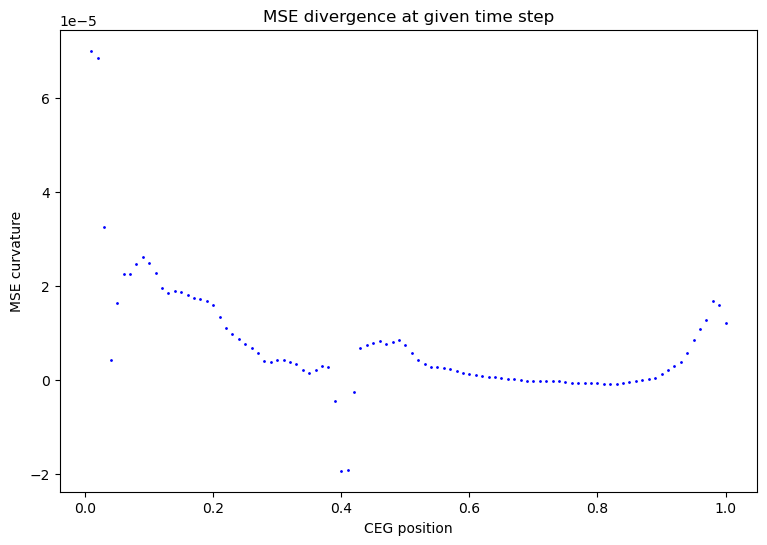

In [16]:
import numpy as np
import os
from matplotlib import pyplot as plt
import scipy as sp

############## Import data

#Input path of measurement data
path = os.getcwd()+os.sep+r'Documents\Confidence_intervals\220317_Al_S2-1_iv' 
#print(path)
if len(path) > 0 and path[0] in ("'", '"') and path[-1] in ("'", '"'):
    path = path[1:-1]
    
#Define time vector  
tunit = 3600 #convert seconds to hours, use 1 if (time) = s 
timeP = np.loadtxt(path +os.sep+r'fits\time-evolution_emission-zone.dat', usecols=(0,))
timeP = timeP/tunit

#Find RSME landscape (EL) files (which end with .el) consisting of position and RMSE columns
files = []
for file in os.listdir(path +os.sep+r'processed-data'):
    if file.endswith(".el"):
        files.append(file)

#Create RSME matrix
N = len(files)
RMSE_map = np.zeros((100, N))
for i, f in enumerate(files):
    vpositions, RMSE_map[:,i] = np.loadtxt(path + os.sep +r'processed-data' + os.sep + f, unpack=True)

#Generate MSE from RMSE
MSE_map = np.square(RMSE_map)  
#For plotting, normalize to minimum  
contour_map = RMSE_map / RMSE_map.min(axis = 0)



######## Calculate the standard deviation of fitting parameters (CEG, EG width)

#Generate the second derivative in x direction
MSE_gradient = np.gradient(MSE_map, axis = 0)  # First derivative in x direction.
MSE_diverg = np.gradient(MSE_gradient, axis = 0)  # Second derivative in x direction.
#Generate Hesse Matrix at optimized parameters point for every time step
Hesse_matrix = np.diag(MSE_diverg[np.argmin(MSE_map,axis=0)])
#Generate Covariant Matrix = MSE*Hessian at optimized parameters point for every time step
Covariant_matrix = MSE_map.min(axis=0)/Hesse_matrix
#Calculate standard error of parameter from Covariant matrix
CEG_standard_error = np.sqrt(2*Covariant_matrix)

CEG_file = np.loadtxt(path +os.sep+r'\processed-data\fits\steady-state_fits.dat', usecols=(0,1,3))
CEG_file[:,0] = timeP
CEG_file_error = np.concatenate((CEG_file, CEG_standard_error[:,None]), axis=1)
#CEG_file_error[:,[2,4]] = CEG_file_error[:,[4,2]]
np.savetxt(path +os.sep+r'\time-evolution_CEG_error.txt', CEG_file_error, header='Time, GEG,  Standard error CEG/d_AM, RMSE \n s,1,1,1',delimiter=',')

print("The CEG uncertainties (in grid steps) are at each time step:")
print(CEG_standard_error)

######## Make figures

#Center of exciton generation (CEG) over time
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('MSE landscape over time, CEG and sigma(CEG) indicated')
ax.set_ylabel('CEG position')
ax.set_xlabel('Time (h)')

#MSE over CEG for a given time
fig, ax2 = plt.subplots(figsize=(9, 6))
ax2.set_title('MSE function at given time step')
ax2.set_ylabel('MSE')
ax2.set_xlabel('CEG position')

#MSE gradient over CEG for a given time
fig, ax3 = plt.subplots(figsize=(9, 6))
ax3.set_title('MSE gradient at given time step')
ax3.set_ylabel('MSE gradient')
ax3.set_xlabel('CEG position')

#MSE divergence over CEG for a given time
fig, ax4 = plt.subplots(figsize=(9, 6))
ax4.set_title('MSE divergence at given time step')
ax4.set_ylabel('MSE curvature')
ax4.set_xlabel('CEG position')

#plot figures:
ax.pcolormesh(timeP, vpositions, np.log(RMSE_map), cmap = 'viridis_r')
#ax.contour(timeP, vpositions, contour_map, [1.2], colors = 'black', linestyles  = '--')
ax.errorbar(timeP, CEG_file[:,1],CEG_standard_error/100,marker='o',capsize=20)
#fig.savefig(path + '/output_contour.png', bbox_inches = 'tight')

#plot MSE, gradient, and divergence at a random time step
ax2.plot(vpositions,MSE_map[:,20], marker='o', markersize=1, linestyle='None', color='blue')
ax3.plot(vpositions,MSE_gradient[:,20], marker='o', markersize=1, linestyle='None', color='blue')
ax4.plot(vpositions,MSE_diverg[:,20], marker='o', markersize=1, linestyle='None', color='blue')


